#Variables
1. Categorical

A. Nominal(Male,Female: Red,Green,Black)

B. Ordinal(A,B,C: Small,Medium,Large) 

2. Numeric

A. Discrete(1,2,3,4,5: No of people)

B. Continuous(Age,Weight,Height)

#Logistic Regression
Logistic regression is a statistical method for anlayzing a dataset in which there are one or more independent variables that determine an outcome.
The outcome is measured with a dischotomous variable.

It is also called binary regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("insurance.csv")

In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
148,53,female,37.430,1,no,northwest,10959.69470
1023,18,male,23.320,1,no,southeast,1711.02680
230,42,female,36.195,1,no,northwest,7443.64305
384,44,male,22.135,2,no,northeast,8302.53565
1182,25,female,30.300,0,no,southwest,2632.99200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [58]:
x = df.iloc[:,[0,1,2,3,5,6]]
y = pd.DataFrame(df.iloc[:,4])

In [59]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [60]:
x.head(2)

,age,sex,bmi,children,region,charges
0,19,female,27.90,0,southwest,16884.9240
1,18,male,33.77,1,southeast,1725.5523


In [61]:
sc = StandardScaler()
le = LabelEncoder()
ohe = OneHotEncoder()

In [62]:
x.iloc[:,[0,2,5]] = sc.fit_transform(pd.DataFrame(x.iloc[:,[0,2,5]]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [63]:
x.head(2)

,age,sex,bmi,children,region,charges
0,-1.438764,female,-0.453320,0,southwest,0.298584
1,-1.509965,male,0.509621,1,southeast,-0.953689


In [64]:
dff=pd.DataFrame(ohe.fit_transform(x.iloc[:,[1,4]]).toarray())
x = x.join(dff)

In [65]:
x.head(2)

,age,sex,bmi,children,region,charges,0,1,2,3,4,5
0,-1.438764,female,-0.453320,0,southwest,0.298584,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.509965,male,0.509621,1,southeast,-0.953689,0.0,1.0,0.0,0.0,1.0,0.0


In [66]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [68]:
x.columns[[1,4]]

Index(['sex', 'region'], dtype='object')

In [70]:
x.drop(x.columns[[1,4]],axis=1,inplace=True)

In [71]:
x.head(2)

,age,bmi,children,charges,0,1,2,3,4,5
0,-1.438764,-0.453320,0,0.298584,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,1,-0.953689,0.0,1.0,0.0,0.0,1.0,0.0


In [72]:
y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression(random_state=0)

In [78]:
model.fit(xtr,ytr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(random_state=0)

In [79]:
ypred = model.predict(xte)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [80]:
from sklearn.metrics import confusion_matrix

In [95]:
cm = confusion_matrix(yte,ypred)

In [96]:
cm

array([[307,  13],
       [  9,  73]])

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
acs = accuracy_score(yte,ypred)

In [85]:
acs

0.945273631840796

In [92]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


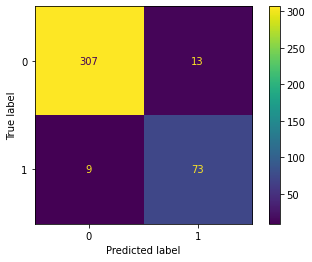

In [97]:
plot_confusion_matrix(model,xte,yte)

In [98]:
model.score(xte,yte)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.945273631840796